# **FIND SIMILAR IMAGES**

*Summary of this notebook:*  
Calculate embedding for the data and use K_Nearest_Neighbors to create clusters of the images.

Load the data that you want in a feature map
Create a feature map by extracting embeddings for a set of data
Run K-nearest neighbor on whatever single item of data you want. 

In this case, we are working on the MSFC Clouds dataset

*Definition of Done:*

In [1]:
import os

# Import google drive and select a root directory
from google.colab import drive
drive.mount("/content/gdrive")

# !ls -lht /content/gdrive

# ROOT_DIR = "/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/nasa_impact/cloudstreet_smaller/"
ROOT_DIR = "/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code"
os.chdir(ROOT_DIR)
# !ls -lht $ROOT_DIR

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import numpy as np
import pickle
from tqdm import tqdm, tqdm_notebook
import random
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import PIL
from PIL import Image
from sklearn.neighbors import NearestNeighbors

import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
# Get the filenames, feature list (embeddings), and classification for the feature extraction done in part 2
# Class_ids are binary. Cloud street or not. 
# filenames = pickle.load(open('/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/nasa_impact/cloudstreet_smaller/filenames-nasa-impact-cloudstreet-smaller.pickle', 'rb'))
# feature_list = pickle.load(open('/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/nasa_impact/cloudstreet_smaller/features-nasa-impact-cloudstreet-smaller-resnet.pickle', 'rb'))
# class_ids = pickle.load(open('/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/nasa_impact/cloudstreet_smaller/class_ids-nasa-impact-cloudstreet-smaller.pickle', 'rb'))

# modelName = "UNETcustomGCP"
# dataset = "MODIS_MCD43A4"

# dataPath = ("Datasets/"+ dataset+ "/Globe/Test/test_set/")
# image_globs=glob.glob(dataPath+'/*/np_arrays/*.npy')

filenames = pickle.load(open("Features/customcolorizer_merced_combined_filenames.pkl",'rb'))
feature_list = pickle.load(open("Features/" + 'customcolorizer' + "_" + 'merced_combined' + "_features.pkl", 'rb'))

In [ ]:
# extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG', '.tif']
 
# def get_file_list(root_dir):
#     file_list = []
#     for root, directories, filenames in os.walk(root_dir):
#         for filename in filenames:
#             print("filename:", filename)
#             if any(ext in filename for ext in extensions):
#                 file_list.append(os.path.join(root, filename))
#     return file_list

# filenames = sorted(get_file_list(ROOT_DIR))

In [4]:
num_images = len(filenames)
num_features_per_image = len(feature_list[0])
print("Number of images = ", num_images)
print("Number of features per image = ", num_features_per_image)

Number of images =  2100
Number of features per image =  2048


In [5]:
# Use scikit-learn to find Nearest Neighbors
# Takes the distance between each embedding for every embedding. 
# num_neighbors = num_images - 1
neighbors = NearestNeighbors(n_neighbors=2099,
                             algorithm='brute',
                             metric='euclidean').fit(feature_list)


In [6]:
# Look at the two closest images in Eucledian distance for any given image

random_index = 2
# KNN distance to all the neighbors with the reference image
distances, indices = neighbors.kneighbors([feature_list[random_index]])

# KNN distance to all the neighbors with the reference image and it's farthest counter image.
A = neighbors.kneighbors_graph([feature_list[random_index], feature_list[indices[0,-1]]], n_neighbors=2099, mode='distance')

# Now we need to find the image that is farthest to both of the above mentioned images.
# So we choose the image that have the maximum sum of the two distances.
combined_distance = np.sum(A.toarray(), axis=0)   # computing sum
sorted_idx = np.argsort(combined_distance)        # sorting the index to get the image with max sum

print(sorted_idx[:50])                     # index of interest
print(A.toarray()[:, sorted_idx[:50]])     # the selected distances

[1846 1439  212    2  107 1636 1741  717  927  822  815  710  920 1624
 1834 1729  298   88  193  646  751  856   48  258  153  748  643  853
   31  136  241 1106 1001 1211 1506 1296 1401 1454 1349 1559  607  502
  397  510  405  615   80  185  290  623]
[[   0.      3527.551      0.         0.         0.      5363.029
  5363.029   3996.1936  3996.1936  3996.1936  3881.622   3881.622
  3881.622   4320.3467  4320.3467  4320.3467  4509.1553  4509.1553
  4509.1553  4080.3367  4080.3367  4080.3367  4394.6304  4394.6304
  4394.6304  3768.962   3768.962   3768.962   4039.6628  4039.6628
  4039.6628  4067.1792  4067.1792  4067.1792  3399.6763  3399.6763
  3399.6763  3959.8098  3959.8098  3959.8098  4422.175   4422.175
  4422.175   4323.8364  4323.8364  4323.8364  4201.454   4201.454
  4201.454   4374.335  ]
 [   0.         0.      5363.029   5363.029   5363.029      0.
     0.      1494.5725  1494.5725  1494.5725  1632.2568  1632.2568
  1632.2568  1199.3503  1199.3503  1199.3503  1010.66595 1

In [10]:
import cv2

11 (256, 256, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


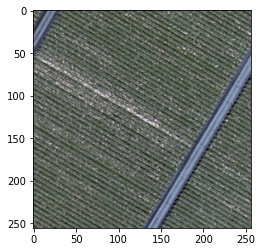

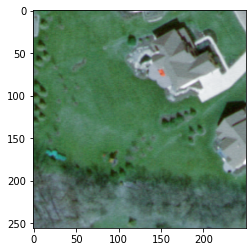

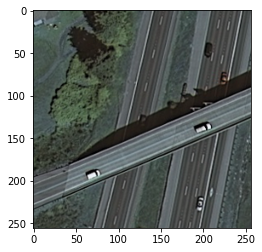

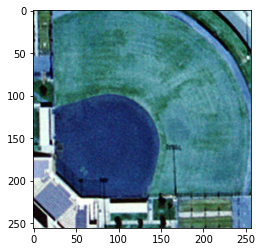

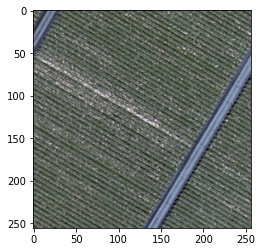

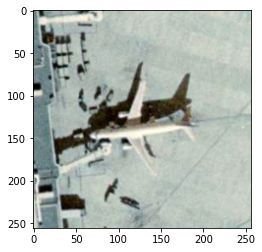

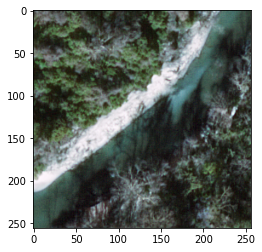

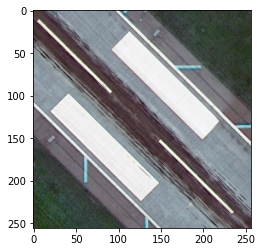

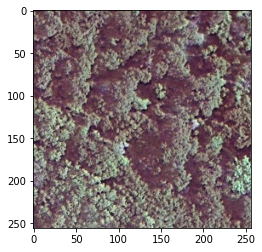

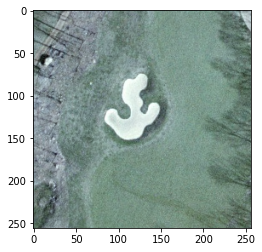

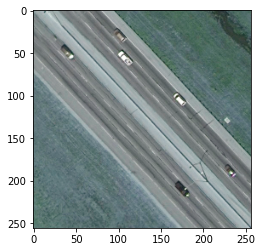

In [11]:

# img_idx = [2]
img_idx = [2, *sorted_idx[:10]]
# img_idx = [2, *sorted_idx[-1:-10:-1]]

fnpy = [cv2.imread('Datasets/UCMerced_LandUse/Images/'+filenames[idx]) for idx in img_idx]
print(len(fnpy), fnpy[0].shape)


# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
  array_min, array_max = array.min(), array.max()
  return (array - array_min) / (array_max - array_min)

for i, elem in enumerate(fnpy):
  cloud_idx = [elem==32767]
  elem[cloud_idx] = 0
  final_img = np.dstack([normalize(elem[:,:,0]), normalize(elem[:,:,1]), normalize(elem[:,:,2])])
  final_img[cloud_idx] = 32767

  plt.imshow(final_img)
  plt.show()

In [12]:
# Plots the five closest images to target 

plt.figure(20)
plt.imshow(mpimg.imread(filenames[random_index]), interpolation='lanczos')

for i in range(1, 5):
  plt.figure(i)
  plt.imshow(mpimg.imread(filenames[indices[0,i]]), interpolation='lanczos')

plt.show()

FileNotFoundError: ignored

<Figure size 432x288 with 0 Axes>

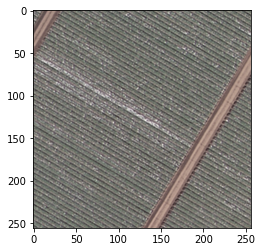

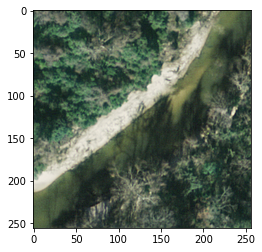

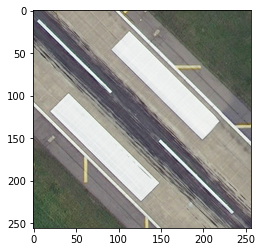

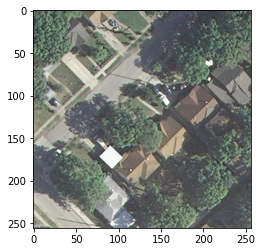

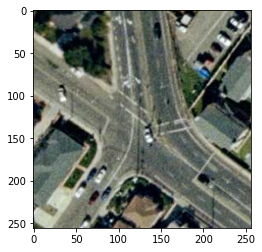

In [13]:
# Plots the five furthest images to target 
plt.figure(20)
plt.imshow(mpimg.imread('Datasets/UCMerced_LandUse/Images/'+filenames[random_index]), interpolation='lanczos')

for i in range(1,5):

  plt.figure(i)
  plt.imshow(mpimg.imread('Datasets/UCMerced_LandUse/Images/'+filenames[indices[0,-i]]), interpolation='lanczos')


plt.show()

In [ ]:
print(*sorted_idx[-1:-10:-1])

3 519 2815 902 918 917 915 914 913
